<a href="https://colab.research.google.com/github/ehsan94/Cordova/blob/master/Deutschland_COVID_19_(SHAP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid-19 (SHAP)**




# Data 0 to 75

In [1]:
%pip install shap

     |████████████████████████████████| 276kB 4.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394128 sha256=8269cbdd3b5426ac391c2a47df4070e75dfb10e713b94e4eb5baf5ab1f7734e2
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_stata('/content/std_inz75_91.dta')
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/io/stata.py:1409: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,D_v404,D_v405,D_v406,D_v423,D_v424,D_v425,D_v442,D_Abhaen,D_Auslae,D_v483,D_Gesamt,D_Aussen,D_Lebens,D_Veraen,D_v599,D_fertil,D_unter6jahre2017,D_nter18jahren201,D_nerunter6jahren,D_nervon6bisunter,D_ldergeburten201,UE_Arbquote2,UE_ArbquoteJ,UE_AntreArbe,UE_AnteArbei,UE_AntreBesc,UE_QuoeBesch,UE_AnteBesch,UE_QuoBescha,UE_BesePrima,UE_BeseimHan,UE_v24,UE_v75,UE_v76,UE_v129,UE_v166,UE_Erwerb,UE_v184,UE_Langze,UE_v97,...,PO_Alters,IS_v1065,IS_v1067,IS_v1068,IS_v1069,IS_v1070,IS_v1071,IS_v1072,IS_v1073,IS_Pkw_Di,IS_Strass,IS_einpen,IS_auspen,IS_nAutobahnen2018,IS_nFlughaefen2018,IS_Oberzentren2018,IS_endlersaldo2017,IS_weg50kmundmehr2,IS_weg150kmundmehr,IS_weg300kmundmehr,IS_mitarbeitsweg50,IS_mitarbeitsweg15,IS_mitarbeitsweg30,G_Pendler_Heinsbe,G_Pendler_Tirsche,G_Pendler_Hohenlo,G_Pendler_Olpe,G_Pendler_Aachen,G_Pendler_Greiz,G_Pendler_Saarbru,G_Pendler_Potsdam,G_latitude,G_longitude,G_distance_Ischgl,Flag100_Pendler_Coesfeld,Flag100_Pendler_Rosenheim,Flag100_Pendler_Goettingen,std_inz_0to75,std_inz_75to91,eastwest
0,46.000000,12.4,-2.5,0.93,2.4,12.3,1.04,38.299999,9.1,3.2,7.9,2.0,81.110001,7.18,24.09,1.68,5.0,10.3,17.5,-8.4,30.600000,3.8,3.3,10.2,23.400000,22.400000,48.500000,20.000000,49.500000,1.29,13.700000,-0.2,18.000000,-8.000000,10.1,39.799999,66.800003,4.9,28.000000,-6.200000,...,2.0,26.0,10.0,1453.0,54.0,1911.0,49.0,558.0,87.0,628.0,636.900024,69.400002,77.300003,12.0,46.0,32.0,-40.200001,13.0,3.4,1.8,0.1,0.6,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.549999,7.116667,457.259216,0.0,0.0,0.0,7.929436,51.103943,1.0
1,43.000000,16.0,-3.5,0.94,4.2,7.6,1.00,29.900000,8.0,2.9,7.6,3.9,82.080002,7.35,24.68,1.84,6.1,11.8,18.1,-6.0,27.799999,2.2,2.0,11.2,26.799999,24.200001,56.799999,17.799999,53.099998,1.62,20.799999,-0.4,-9.100000,0.000000,6.4,46.700001,69.199997,-2.7,17.700001,-24.900000,...,1.2,25.0,8.0,1646.0,57.0,2207.0,46.0,994.0,77.0,618.0,524.900024,70.400002,80.800003,14.0,53.0,25.0,-53.799999,20.0,3.3,2.1,1.1,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.466667,11.133333,173.721573,0.0,0.0,0.0,4.718663,97.875450,1.0
2,42.500000,14.9,-2.3,0.88,4.0,6.3,0.98,28.900000,12.6,4.0,6.3,6.6,81.930000,7.18,24.59,1.75,5.9,12.3,12.6,-6.4,25.000000,2.7,2.7,12.4,26.100000,22.799999,54.400002,19.299999,57.200001,1.04,21.400000,-0.3,3.100000,-2.600000,5.0,40.000000,57.500000,2.2,24.500000,5.800000,...,1.3,22.0,8.0,1383.0,60.0,195.0,51.0,402.0,94.0,619.0,385.899994,66.300003,78.099998,17.0,57.0,23.0,-54.700001,9.2,3.6,1.5,1.0,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.400002,9.983334,156.045456,0.0,0.0,0.0,8.526311,125.029121,1.0
3,49.700001,-1.4,-7.5,0.88,-4.3,-13.3,1.04,50.799999,3.2,2.0,-2.6,1.1,80.419998,8.98,24.00,1.84,4.4,9.2,4.3,6.5,3.300000,8.6,11.0,7.7,28.799999,15.400000,53.200001,23.799999,52.500000,2.48,14.900000,-3.1,-20.799999,-28.200001,-15.9,22.000000,63.299999,-3.7,43.299999,-31.700001,...,0.9,45.0,8.0,1458.0,62.0,1774.0,55.0,594.0,83.0,565.0,344.200012,65.000000,71.699997,14.0,64.0,28.0,-25.299999,15.2,6.4,4.3,-2.1,-1.8,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.983334,12.433333,468.846863,0.0,0.0,0.0,1.614463,23.919840,0.0
4,44.700001,9.4,-1.5,0.93,-0.3,-7.4,1.02,34.099998,7.2,2.1,2.6,0.9,79.980003,6.30,23.07,1.60,5.2,11.2,8.7,-8.4,13.000000,4.7,4.1,10.4,23.799999,23.200001,52.900002,19.700001,49.200001,0.52,18.799999,-0.5,9.400000,-7.300000,6.2,40.799999,85.400002,0.1,32.900002,-11.000000,...,2.1,44.0,8.0,1495.0,49.0,1835.0,37.0,1155.0,67.0,622.0,536.500000,80.699997,81.900002,20.0,57.0,32.0,-31.100000,9.7,2.7,1.4,-0.1,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.683334,7.650000,451.906799,0.0,0.0,0.0,5.352468,38.366455,1.0


In [37]:
df.shape

(401, 165)

In [9]:
Y = df['std_inz_75to91']
X = df.loc[:, ~df.columns.isin(['std_inz_0to75', 'std_inz_75to91', 'eastwest'])]

In [65]:
rf = RandomForestRegressor( random_state=0, n_estimators=1000, max_features = "auto")
rf.fit(X, Y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

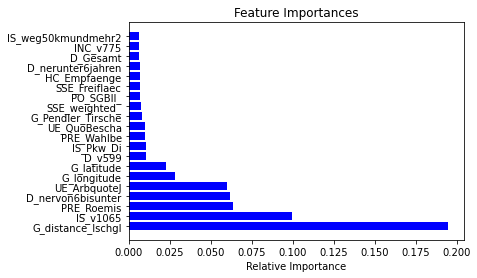

In [66]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
idx = np.argsort(importances)[-20:][::-1]
plt.title('Feature Importances')
plt.barh(range(len(idx)), importances[idx], color='b', align='center')
plt.yticks(range(len(idx)), [features[i] for i in idx])
plt.xlabel('Relative Importance')
plt.show()

In [67]:
import shap
explainer = shap.KernelExplainer(rf.predict,X)

Using 401 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer.shap_values(X, nsamples=100)

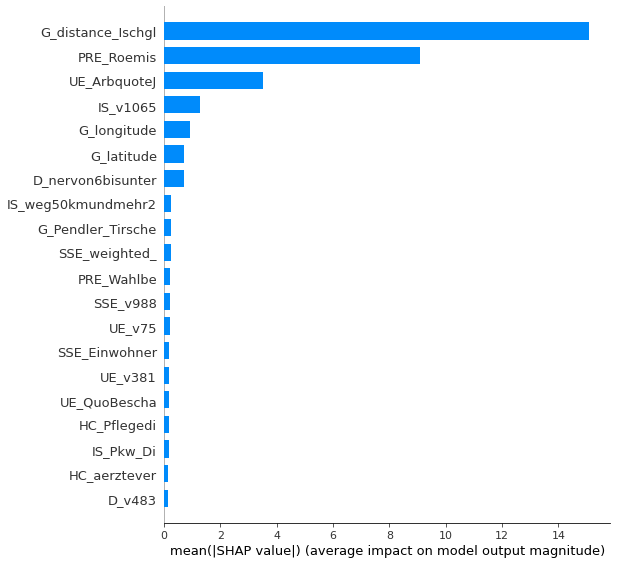

In [69]:
shap.summary_plot(shap_values, X, plot_type="bar")

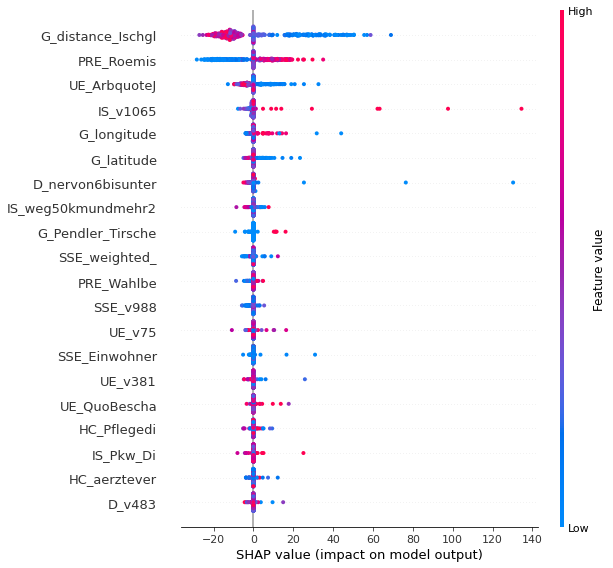

In [70]:
shap.summary_plot(shap_values, X)

# **WEST Germany**

In [112]:
df = pd.read_stata('/content/std_inz75_91.dta')
df.head()


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


,D_v404,D_v405,D_v406,D_v423,D_v424,D_v425,D_v442,D_Abhaen,D_Auslae,D_v483,D_Gesamt,D_Aussen,D_Lebens,D_Veraen,D_v599,D_fertil,D_unter6jahre2017,D_nter18jahren201,D_nerunter6jahren,D_nervon6bisunter,D_ldergeburten201,UE_Arbquote2,UE_ArbquoteJ,UE_AntreArbe,UE_AnteArbei,UE_AntreBesc,UE_QuoeBesch,UE_AnteBesch,UE_QuoBescha,UE_BesePrima,UE_BeseimHan,UE_v24,UE_v75,UE_v76,UE_v129,UE_v166,UE_Erwerb,UE_v184,UE_Langze,UE_v97,...,PO_Alters,IS_v1065,IS_v1067,IS_v1068,IS_v1069,IS_v1070,IS_v1071,IS_v1072,IS_v1073,IS_Pkw_Di,IS_Strass,IS_einpen,IS_auspen,IS_nAutobahnen2018,IS_nFlughaefen2018,IS_Oberzentren2018,IS_endlersaldo2017,IS_weg50kmundmehr2,IS_weg150kmundmehr,IS_weg300kmundmehr,IS_mitarbeitsweg50,IS_mitarbeitsweg15,IS_mitarbeitsweg30,G_Pendler_Heinsbe,G_Pendler_Tirsche,G_Pendler_Hohenlo,G_Pendler_Olpe,G_Pendler_Aachen,G_Pendler_Greiz,G_Pendler_Saarbru,G_Pendler_Potsdam,G_latitude,G_longitude,G_distance_Ischgl,Flag100_Pendler_Coesfeld,Flag100_Pendler_Rosenheim,Flag100_Pendler_Goettingen,std_inz_0to75,std_inz_75to91,eastwest
0,46.000000,12.4,-2.5,0.93,2.4,12.3,1.04,38.299999,9.1,3.2,7.9,2.0,81.110001,7.18,24.09,1.68,5.0,10.3,17.5,-8.4,30.600000,3.8,3.3,10.2,23.400000,22.400000,48.500000,20.000000,49.500000,1.29,13.700000,-0.2,18.000000,-8.000000,10.1,39.799999,66.800003,4.9,28.000000,-6.200000,...,2.0,26.0,10.0,1453.0,54.0,1911.0,49.0,558.0,87.0,628.0,636.900024,69.400002,77.300003,12.0,46.0,32.0,-40.200001,13.0,3.4,1.8,0.1,0.6,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.549999,7.116667,457.259216,0.0,0.0,0.0,7.929436,51.103943,1.0
1,43.000000,16.0,-3.5,0.94,4.2,7.6,1.00,29.900000,8.0,2.9,7.6,3.9,82.080002,7.35,24.68,1.84,6.1,11.8,18.1,-6.0,27.799999,2.2,2.0,11.2,26.799999,24.200001,56.799999,17.799999,53.099998,1.62,20.799999,-0.4,-9.100000,0.000000,6.4,46.700001,69.199997,-2.7,17.700001,-24.900000,...,1.2,25.0,8.0,1646.0,57.0,2207.0,46.0,994.0,77.0,618.0,524.900024,70.400002,80.800003,14.0,53.0,25.0,-53.799999,20.0,3.3,2.1,1.1,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.466667,11.133333,173.721573,0.0,0.0,0.0,4.718663,97.875450,1.0
2,42.500000,14.9,-2.3,0.88,4.0,6.3,0.98,28.900000,12.6,4.0,6.3,6.6,81.930000,7.18,24.59,1.75,5.9,12.3,12.6,-6.4,25.000000,2.7,2.7,12.4,26.100000,22.799999,54.400002,19.299999,57.200001,1.04,21.400000,-0.3,3.100000,-2.600000,5.0,40.000000,57.500000,2.2,24.500000,5.800000,...,1.3,22.0,8.0,1383.0,60.0,195.0,51.0,402.0,94.0,619.0,385.899994,66.300003,78.099998,17.0,57.0,23.0,-54.700001,9.2,3.6,1.5,1.0,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.400002,9.983334,156.045456,0.0,0.0,0.0,8.526311,125.029121,1.0
3,49.700001,-1.4,-7.5,0.88,-4.3,-13.3,1.04,50.799999,3.2,2.0,-2.6,1.1,80.419998,8.98,24.00,1.84,4.4,9.2,4.3,6.5,3.300000,8.6,11.0,7.7,28.799999,15.400000,53.200001,23.799999,52.500000,2.48,14.900000,-3.1,-20.799999,-28.200001,-15.9,22.000000,63.299999,-3.7,43.299999,-31.700001,...,0.9,45.0,8.0,1458.0,62.0,1774.0,55.0,594.0,83.0,565.0,344.200012,65.000000,71.699997,14.0,64.0,28.0,-25.299999,15.2,6.4,4.3,-2.1,-1.8,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.983334,12.433333,468.846863,0.0,0.0,0.0,1.614463,23.919840,0.0
4,44.700001,9.4,-1.5,0.93,-0.3,-7.4,1.02,34.099998,7.2,2.1,2.6,0.9,79.980003,6.30,23.07,1.60,5.2,11.2,8.7,-8.4,13.000000,4.7,4.1,10.4,23.799999,23.200001,52.900002,19.700001,49.200001,0.52,18.799999,-0.5,9.400000,-7.300000,6.2,40.799999,85.400002,0.1,32.900002,-11.000000,...,2.1,44.0,8.0,1495.0,49.0,1835.0,37.0,1155.0,67.0,622.0,536.500000,80.699997,81.900002,20.0,57.0,32.0,-31.100000,9.7,2.7,1.4,-0.1,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.683334,7.650000,451.906799,0.0,0.0,0.0,5.352468,38.366455,1.0


In [113]:
df = df[df['eastwest'] == 1.0]
df.head()

,D_v404,D_v405,D_v406,D_v423,D_v424,D_v425,D_v442,D_Abhaen,D_Auslae,D_v483,D_Gesamt,D_Aussen,D_Lebens,D_Veraen,D_v599,D_fertil,D_unter6jahre2017,D_nter18jahren201,D_nerunter6jahren,D_nervon6bisunter,D_ldergeburten201,UE_Arbquote2,UE_ArbquoteJ,UE_AntreArbe,UE_AnteArbei,UE_AntreBesc,UE_QuoeBesch,UE_AnteBesch,UE_QuoBescha,UE_BesePrima,UE_BeseimHan,UE_v24,UE_v75,UE_v76,UE_v129,UE_v166,UE_Erwerb,UE_v184,UE_Langze,UE_v97,...,PO_Alters,IS_v1065,IS_v1067,IS_v1068,IS_v1069,IS_v1070,IS_v1071,IS_v1072,IS_v1073,IS_Pkw_Di,IS_Strass,IS_einpen,IS_auspen,IS_nAutobahnen2018,IS_nFlughaefen2018,IS_Oberzentren2018,IS_endlersaldo2017,IS_weg50kmundmehr2,IS_weg150kmundmehr,IS_weg300kmundmehr,IS_mitarbeitsweg50,IS_mitarbeitsweg15,IS_mitarbeitsweg30,G_Pendler_Heinsbe,G_Pendler_Tirsche,G_Pendler_Hohenlo,G_Pendler_Olpe,G_Pendler_Aachen,G_Pendler_Greiz,G_Pendler_Saarbru,G_Pendler_Potsdam,G_latitude,G_longitude,G_distance_Ischgl,Flag100_Pendler_Coesfeld,Flag100_Pendler_Rosenheim,Flag100_Pendler_Goettingen,std_inz_0to75,std_inz_75to91,eastwest
0,46.000000,12.4,-2.5,0.93,2.4,12.3,1.04,38.299999,9.1,3.2,7.9,2.0,81.110001,7.18,24.090000,1.68,5.0,10.3,17.5,-8.4,30.600000,3.8,3.3,10.2,23.400000,22.400000,48.500000,20.000000,49.500000,1.29,13.700000,-0.2,18.0,-8.0,10.1,39.799999,66.800003,4.9,28.000000,-6.2,...,2.0,26.0,10.0,1453.0,54.0,1911.0,49.0,558.0,87.0,628.0,636.900024,69.400002,77.300003,12.0,46.0,32.0,-40.200001,13.0,3.4,1.8,0.1,0.6,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.549999,7.116667,457.259216,0.0,0.0,0.0,7.929436,51.103943,1.0
1,43.000000,16.0,-3.5,0.94,4.2,7.6,1.00,29.900000,8.0,2.9,7.6,3.9,82.080002,7.35,24.680000,1.84,6.1,11.8,18.1,-6.0,27.799999,2.2,2.0,11.2,26.799999,24.200001,56.799999,17.799999,53.099998,1.62,20.799999,-0.4,-9.1,0.0,6.4,46.700001,69.199997,-2.7,17.700001,-24.9,...,1.2,25.0,8.0,1646.0,57.0,2207.0,46.0,994.0,77.0,618.0,524.900024,70.400002,80.800003,14.0,53.0,25.0,-53.799999,20.0,3.3,2.1,1.1,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.466667,11.133333,173.721573,0.0,0.0,0.0,4.718663,97.875450,1.0
2,42.500000,14.9,-2.3,0.88,4.0,6.3,0.98,28.900000,12.6,4.0,6.3,6.6,81.930000,7.18,24.590000,1.75,5.9,12.3,12.6,-6.4,25.000000,2.7,2.7,12.4,26.100000,22.799999,54.400002,19.299999,57.200001,1.04,21.400000,-0.3,3.1,-2.6,5.0,40.000000,57.500000,2.2,24.500000,5.8,...,1.3,22.0,8.0,1383.0,60.0,195.0,51.0,402.0,94.0,619.0,385.899994,66.300003,78.099998,17.0,57.0,23.0,-54.700001,9.2,3.6,1.5,1.0,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.400002,9.983334,156.045456,0.0,0.0,0.0,8.526311,125.029121,1.0
4,44.700001,9.4,-1.5,0.93,-0.3,-7.4,1.02,34.099998,7.2,2.1,2.6,0.9,79.980003,6.30,23.070000,1.60,5.2,11.2,8.7,-8.4,13.000000,4.7,4.1,10.4,23.799999,23.200001,52.900002,19.700001,49.200001,0.52,18.799999,-0.5,9.4,-7.3,6.2,40.799999,85.400002,0.1,32.900002,-11.0,...,2.1,44.0,8.0,1495.0,49.0,1835.0,37.0,1155.0,67.0,622.0,536.500000,80.699997,81.900002,20.0,57.0,32.0,-31.100000,9.7,2.7,1.4,-0.1,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.683334,7.650000,451.906799,0.0,0.0,0.0,5.352468,38.366455,1.0
6,44.099998,11.1,-3.9,0.92,3.6,11.6,1.03,33.500000,10.8,4.1,10.1,6.1,80.559998,7.21,23.709999,1.69,5.5,11.3,14.5,-4.0,19.100000,3.3,3.2,11.3,24.299999,23.000000,56.900002,19.500000,53.200001,1.17,16.500000,-0.2,6.4,-2.1,3.5,45.700001,108.000000,2.6,24.700001,-1.6,...,3.4,45.0,8.0,974.0,71.0,1373.0,62.0,1592.0,58.0,606.0,529.299988,76.199997,75.400002,9.0,59.0,9.0,3.400000,10.6,2.9,2.0,-0.4,0.2,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.233334,12.683333,225.264618,0.0,1.0,0.0,0.000000,142.660980,1.0


In [114]:
Y = df['std_inz_75to91']
X = df.loc[:, ~df.columns.isin(['std_inz_0to75', 'std_inz_75to91'])]

In [116]:
rf = RandomForestRegressor( random_state=0, n_estimators=3000, max_features = "auto")
rf.fit(X, Y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [117]:
import shap
explainer = shap.KernelExplainer(rf.predict,X)

Using 324 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer.shap_values(X, nsamples=100)

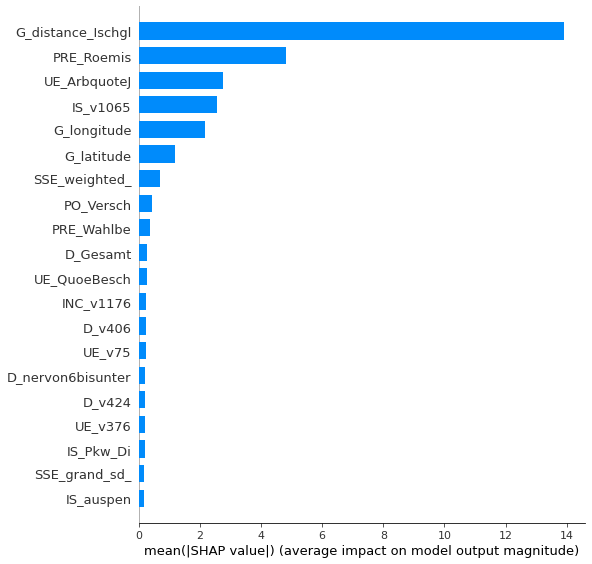

In [119]:
shap.summary_plot(shap_values, X, plot_type="bar")

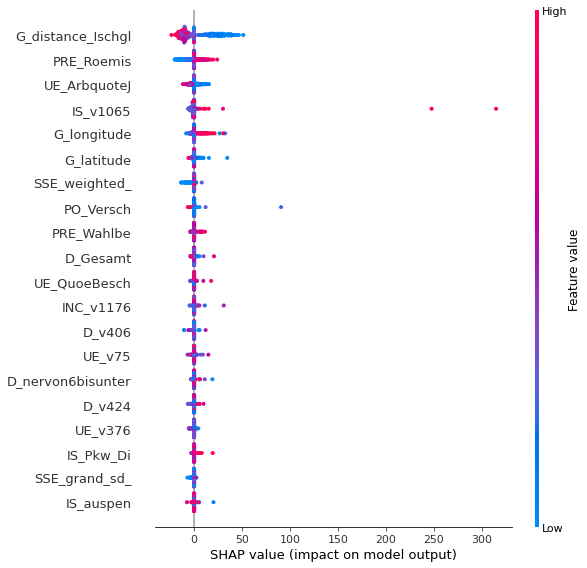

In [120]:
shap.summary_plot(shap_values, X)

# **East Germany**

In [106]:
df = pd.read_stata('/content/std_inz75_91.dta')
df.head()


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


,D_v404,D_v405,D_v406,D_v423,D_v424,D_v425,D_v442,D_Abhaen,D_Auslae,D_v483,D_Gesamt,D_Aussen,D_Lebens,D_Veraen,D_v599,D_fertil,D_unter6jahre2017,D_nter18jahren201,D_nerunter6jahren,D_nervon6bisunter,D_ldergeburten201,UE_Arbquote2,UE_ArbquoteJ,UE_AntreArbe,UE_AnteArbei,UE_AntreBesc,UE_QuoeBesch,UE_AnteBesch,UE_QuoBescha,UE_BesePrima,UE_BeseimHan,UE_v24,UE_v75,UE_v76,UE_v129,UE_v166,UE_Erwerb,UE_v184,UE_Langze,UE_v97,...,PO_Alters,IS_v1065,IS_v1067,IS_v1068,IS_v1069,IS_v1070,IS_v1071,IS_v1072,IS_v1073,IS_Pkw_Di,IS_Strass,IS_einpen,IS_auspen,IS_nAutobahnen2018,IS_nFlughaefen2018,IS_Oberzentren2018,IS_endlersaldo2017,IS_weg50kmundmehr2,IS_weg150kmundmehr,IS_weg300kmundmehr,IS_mitarbeitsweg50,IS_mitarbeitsweg15,IS_mitarbeitsweg30,G_Pendler_Heinsbe,G_Pendler_Tirsche,G_Pendler_Hohenlo,G_Pendler_Olpe,G_Pendler_Aachen,G_Pendler_Greiz,G_Pendler_Saarbru,G_Pendler_Potsdam,G_latitude,G_longitude,G_distance_Ischgl,Flag100_Pendler_Coesfeld,Flag100_Pendler_Rosenheim,Flag100_Pendler_Goettingen,std_inz_0to75,std_inz_75to91,eastwest
0,46.000000,12.4,-2.5,0.93,2.4,12.3,1.04,38.299999,9.1,3.2,7.9,2.0,81.110001,7.18,24.09,1.68,5.0,10.3,17.5,-8.4,30.600000,3.8,3.3,10.2,23.400000,22.400000,48.500000,20.000000,49.500000,1.29,13.700000,-0.2,18.000000,-8.000000,10.1,39.799999,66.800003,4.9,28.000000,-6.200000,...,2.0,26.0,10.0,1453.0,54.0,1911.0,49.0,558.0,87.0,628.0,636.900024,69.400002,77.300003,12.0,46.0,32.0,-40.200001,13.0,3.4,1.8,0.1,0.6,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.549999,7.116667,457.259216,0.0,0.0,0.0,7.929436,51.103943,1.0
1,43.000000,16.0,-3.5,0.94,4.2,7.6,1.00,29.900000,8.0,2.9,7.6,3.9,82.080002,7.35,24.68,1.84,6.1,11.8,18.1,-6.0,27.799999,2.2,2.0,11.2,26.799999,24.200001,56.799999,17.799999,53.099998,1.62,20.799999,-0.4,-9.100000,0.000000,6.4,46.700001,69.199997,-2.7,17.700001,-24.900000,...,1.2,25.0,8.0,1646.0,57.0,2207.0,46.0,994.0,77.0,618.0,524.900024,70.400002,80.800003,14.0,53.0,25.0,-53.799999,20.0,3.3,2.1,1.1,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.466667,11.133333,173.721573,0.0,0.0,0.0,4.718663,97.875450,1.0
2,42.500000,14.9,-2.3,0.88,4.0,6.3,0.98,28.900000,12.6,4.0,6.3,6.6,81.930000,7.18,24.59,1.75,5.9,12.3,12.6,-6.4,25.000000,2.7,2.7,12.4,26.100000,22.799999,54.400002,19.299999,57.200001,1.04,21.400000,-0.3,3.100000,-2.600000,5.0,40.000000,57.500000,2.2,24.500000,5.800000,...,1.3,22.0,8.0,1383.0,60.0,195.0,51.0,402.0,94.0,619.0,385.899994,66.300003,78.099998,17.0,57.0,23.0,-54.700001,9.2,3.6,1.5,1.0,0.8,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.400002,9.983334,156.045456,0.0,0.0,0.0,8.526311,125.029121,1.0
3,49.700001,-1.4,-7.5,0.88,-4.3,-13.3,1.04,50.799999,3.2,2.0,-2.6,1.1,80.419998,8.98,24.00,1.84,4.4,9.2,4.3,6.5,3.300000,8.6,11.0,7.7,28.799999,15.400000,53.200001,23.799999,52.500000,2.48,14.900000,-3.1,-20.799999,-28.200001,-15.9,22.000000,63.299999,-3.7,43.299999,-31.700001,...,0.9,45.0,8.0,1458.0,62.0,1774.0,55.0,594.0,83.0,565.0,344.200012,65.000000,71.699997,14.0,64.0,28.0,-25.299999,15.2,6.4,4.3,-2.1,-1.8,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.983334,12.433333,468.846863,0.0,0.0,0.0,1.614463,23.919840,0.0
4,44.700001,9.4,-1.5,0.93,-0.3,-7.4,1.02,34.099998,7.2,2.1,2.6,0.9,79.980003,6.30,23.07,1.60,5.2,11.2,8.7,-8.4,13.000000,4.7,4.1,10.4,23.799999,23.200001,52.900002,19.700001,49.200001,0.52,18.799999,-0.5,9.400000,-7.300000,6.2,40.799999,85.400002,0.1,32.900002,-11.000000,...,2.1,44.0,8.0,1495.0,49.0,1835.0,37.0,1155.0,67.0,622.0,536.500000,80.699997,81.900002,20.0,57.0,32.0,-31.100000,9.7,2.7,1.4,-0.1,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.683334,7.650000,451.906799,0.0,0.0,0.0,5.352468,38.366455,1.0


In [107]:
df = df[df['eastwest'] == 0.0]
Y = df['std_inz_75to91']
X = df.loc[:, ~df.columns.isin(['std_inz_0to75', 'std_inz_75to91'])]

In [108]:
rf = RandomForestRegressor(max_depth=1000, random_state=0, n_estimators=2000, max_features = 50)
rf.fit(X, Y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=1000, max_features=50, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [109]:
import shap
explainer = shap.KernelExplainer(rf.predict,X)

In [ ]:
shap_values = explainer.shap_values(X, nsamples=100)

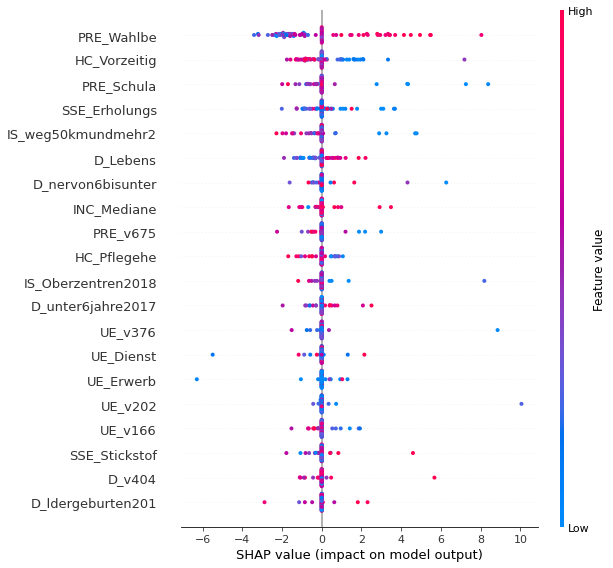

In [111]:
shap.summary_plot(shap_values, X)